In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from pathlib import Path

In [3]:
import sys
sys.path.append(str(Path.cwd().parent))
from model.data_processing import load_and_clean_data
from model.recommendation_engine import RecommendationEngine

In [5]:
movies_data = load_and_clean_data()
ratings_df = pd.read_csv('../data/ratings.csv')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [4]:
print("Movies Data:")
display(movies_df.head(2))
print("\nRatings Data:")
display(ratings_df.head(2))

Movies Data:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy



Ratings Data:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [5]:
# Data preprocessing
movies_data = load_and_clean_data()
movies_data = fetch_posters(movies_data)

C:\Temp\ipykernel_3804\2136772207.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


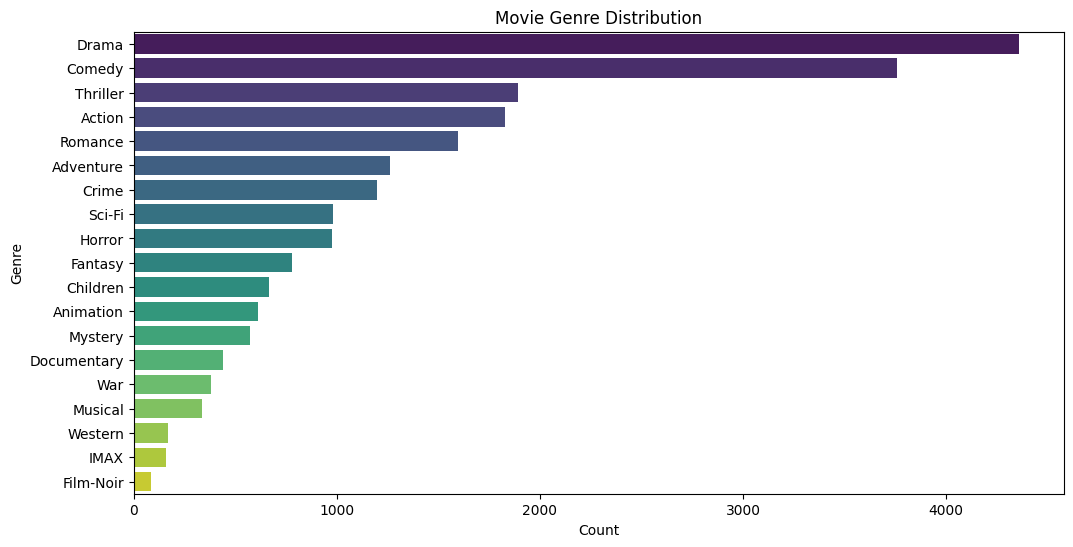

In [6]:
genre_counts = pd.Series([genre for genres in movies_data['genres'] for genre in genres]).value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Movie Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

C:\Temp\ipykernel_3804\1784039753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings_df, palette='coolwarm')


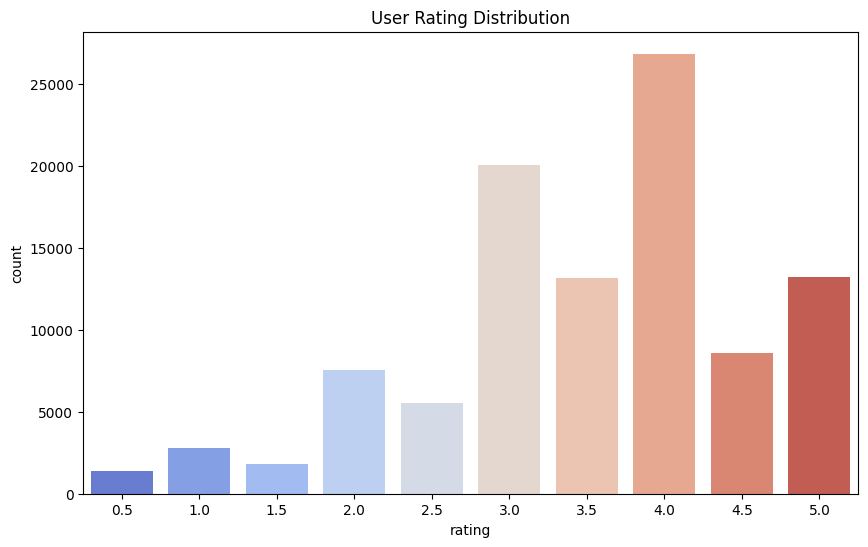

In [7]:
# Ratings analysis
plt.figure(figsize=(10,6))
sns.countplot(x='rating', data=ratings_df, palette='coolwarm')
plt.title('User Rating Distribution')
plt.show()

In [8]:
engine = RecommendationEngine(movies_data, ratings_df)
engine.initialize_models()


In [9]:
# Content-based filtering test
def test_content_recommendations(movie_title):
    results = engine.search_by_title(movie_title)
    print(f"Recommendations for '{movie_title}':")
    display(results[['title', 'genres', 'poster_path']])

test_content_recommendations("Toy Story")

Recommendations for 'Toy Story':


,title,genres,poster_path
7355,Toy Story 3 2010,"[Adventure, Animation, Children, Comedy, Fanta...",https://image.tmdb.org/t/p/w500/AbbXspMOwdvwWZ...
0,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]",https://image.tmdb.org/t/p/w500/uXDfjJbdP4ijW5...
2355,Toy Story 2 1999,"[Adventure, Animation, Children, Comedy, Fantasy]",https://image.tmdb.org/t/p/w500/yFWQkz2ynjwsaz...
3595,Toy The 1982,[Comedy],https://image.tmdb.org/t/p/w500/yt7Z37Uo2zls64...
4089,Toy Soldiers 1991,"[Action, Drama]",https://image.tmdb.org/t/p/w500/nL3ccvqU1Wq1j3...
8736,True Story 2015,"[Drama, Mystery, Thriller]",https://image.tmdb.org/t/p/w500/ncP8XQ0bXP0xSp...
1570,LA Story 1991,"[Comedy, Romance]",https://image.tmdb.org/t/p/w500/dVDCImNu9lM3MT...
3187,Love Story 1970,"[Drama, Romance]",https://image.tmdb.org/t/p/w500/5A7SGcT1GlhWfH...
9548,Kids Story 2003,"[Animation, Sci-Fi]",https://image.tmdb.org/t/p/w500/SteXNwc3hRV9o2...
5264,Cinderella Story A 2004,"[Comedy, Romance]",https://image.tmdb.org/t/p/w500/ukwP7gDPWxj1R1...


In [10]:
# Collaborative filtering test
def test_collaborative_recommendations(user_id):
    results = engine.get_collaborative_recommendations(user_id)
    print(f"Recommendations for user {user_id}:")
    display(results[['title', 'genres', 'poster_path', 'avg_rating']])

test_collaborative_recommendations(1)

Recommendations for user 1:


,title,genres,poster_path,avg_rating
3,Seven aka Se7en 1995,"[Mystery, Thriller]",https://image.tmdb.org/t/p/w500/191nKfP0ehp3uI...,3.975369
7,Rob Roy 1995,"[Action, Drama, Romance, War]",https://image.tmdb.org/t/p/w500/nl7Lg6VqR9h1Z9...,3.545455
5,Bottle Rocket 1996,"[Adventure, Comedy, Crime, Romance]",https://image.tmdb.org/t/p/w500/6E7mJ5wpzTFbYF...,3.782609
4,Usual Suspects The 1995,"[Crime, Mystery, Thriller]",https://image.tmdb.org/t/p/w500/rWbsxdwF9qQzpT...,4.237745
11,Dumb Dumber Dumb and Dumber 1994,"[Adventure, Comedy]",https://image.tmdb.org/t/p/w500/4LdpBXiCyGKkR8...,3.060150
10,Billy Madison 1995,[Comedy],https://image.tmdb.org/t/p/w500/sOdgtJdFalL9kR...,3.326531
9,Desperado 1995,"[Action, Romance, Western]",https://image.tmdb.org/t/p/w500/e3gwpBeXpvGZsx...,3.560606
8,Canadian Bacon 1995,"[Comedy, War]",https://image.tmdb.org/t/p/w500/bzK2aQ8xUB67kw...,2.863636
68,Terminator The 1984,"[Action, Sci-Fi, Thriller]",https://image.tmdb.org/t/p/w500/hzXSE66v6KthZ8...,3.896947
69,Duck Soup 1933,"[Comedy, Musical, War]",https://image.tmdb.org/t/p/w500/31t63plEGKHhYu...,3.804348


In [11]:
# Hybrid recommendations test
def test_hybrid_recommendations(user_input):
    results = engine.hybrid_recommendation(user_input)
    print(f"Hybrid recommendations based on '{user_input}':")
    display(results[['title', 'genres', 'poster_path', 'score']])

test_hybrid_recommendations("Matrix")

Hybrid recommendations based on 'Matrix':


,title,genres,poster_path,score
0,Matrix The 1999,"[Action, Sci-Fi, Thriller]",https://image.tmdb.org/t/p/w500/dXNAPwY7VrqMAo...,0.654455
2,Matrix Reloaded The 2003,"[Action, Adventure, Sci-Fi, Thriller, IMAX]",https://image.tmdb.org/t/p/w500/9TGHDvWrqKBzwD...,0.503437
1,Matrix Revolutions The 2003,"[Action, Adventure, Sci-Fi, Thriller, IMAX]",https://image.tmdb.org/t/p/w500/t1wm4PgOQ8e4z1...,0.491301
29,Sorry to Bother You 2018,"[Comedy, Fantasy, Sci-Fi]",https://image.tmdb.org/t/p/w500/peTl1V04E9ppvh...,0.270000
8,Andrew Dice Clay Dice Rules 1991,[Comedy],https://image.tmdb.org/t/p/w500/yXmkQVETaCr8BH...,0.240000
22,Heat 1995,"[Action, Crime, Thriller]",https://image.tmdb.org/t/p/w500/umSVjVdbVwtx5r...,0.236765
4,Casino 1995,"[Crime, Drama]",https://image.tmdb.org/t/p/w500/gziIkUSnYuj9Ch...,0.235610
7,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]",https://image.tmdb.org/t/p/w500/uXDfjJbdP4ijW5...,0.235256
14,Nixon 1995,[Drama],https://image.tmdb.org/t/p/w500/8O2sBYJq0K0EMp...,0.230000
5,Sense and Sensibility 1995,"[Drama, Romance]",https://image.tmdb.org/t/p/w500/cBK2yL3HqhFvIV...,0.226567


In [12]:
# Model persistence test
engine.save_models("../model/recommendation_models.pkl")


In [13]:
# Verify model loading
new_engine = RecommendationEngine(movies_data, ratings_df)
new_engine.load_models("../model/recommendation_models.pkl")

In [14]:
!jupyter nbconvert --to script model.ipynb --output-dir ../model

[NbConvertApp] Converting notebook model.ipynb to script
[NbConvertApp] Writing 5224 bytes to ..\model\model.py


In [15]:
def verify_posters(movies_data, sample_size=5):
    # Check random posters
    sample = movies_data[movies_data['poster_path'].notna()].sample(sample_size)
    
    for idx, row in sample.iterrows():
        print(f"\nMovie: {row['title']}")
        print(f"Poster URL: {row['poster_path']}")
        print(f"HTTP Status: {requests.head(row['poster_path']).status_code}")  # Check URL validity

In [22]:
import requests  # Add this import at the top of your notebook/script

def verify_posters(movies_data, sample_size=5):
    # Check random posters
    sample = movies_data[movies_data['poster_path'].notna()].sample(sample_size)
    
    for idx, row in sample.iterrows():
        print(f"\nMovie: {row['title']}")
        print(f"Poster URL: {row['poster_path']}")
        try:
            response = requests.head(row['poster_path'], timeout=5)
            print(f"HTTP Status: {response.status_code}")
        except Exception as e:
            print(f"Connection Error: {str(e)}")

# Now run the verification
verify_posters(movies_data)


Movie: 5 Centimeters per Second Bysoku 5 senchimtoru 2007
Poster URL: https://image.tmdb.org/t/p/w500/dFipUR6W0y3PPkuVS8gjFd929m2.jpg
HTTP Status: 200

Movie: Police Academy 5 Assignment Miami Beach 1988
Poster URL: https://image.tmdb.org/t/p/w500/8w1SqGceTYHbVmXh8JHdWHza2SF.jpg
HTTP Status: 200

Movie: Friday the 13th 1980
Poster URL: https://image.tmdb.org/t/p/w500/uGGpnWHOmWTARVN9wbC1nPxNgps.jpg
HTTP Status: 200

Movie: With a Friend Like Harry Harry un ami qui vous veut du bien 2000
Poster URL: https://image.tmdb.org/t/p/w500/dZV9UTyHJ4LD4ntWudWyqBNhb8I.jpg
HTTP Status: 200

Movie: Samoura Le Godson The 1967
Poster URL: https://image.tmdb.org/t/p/w500/5Fa6o5nfUPEatQ9b3OwEvdEdR7T.jpg
HTTP Status: 200


In [23]:
# Save a file csv havings posters
movies_data = movies_data[['movieId', 'title', 'genres', 'poster_path']]

# Save to CSV/Parquet
movies_data.to_csv('movies_with_posters.csv', index=False)
# OR for better performance with large datasets
movies_data.to_parquet('movies_with_posters.parquet', index=False)

print("Saved processed movies data!")

Saved processed movies data!
